<a href="https://colab.research.google.com/github/AlexVonSchwerdtner/BA780-Team6/blob/main/Boston_Crime_Scene_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*BA780 - Team 6*
##Team Project

#**Boston Crime Scene Analytics**

###*Problem definition:*

As current students living in the Boston Area we are interested in analyzing the Boston Crime Scene. We would like to analyze and discover what types of crimes are most common, where the different types of crimes are most likely to occur, and if the frequency of crimes change over specific time spans (e.g. day, week & year). Our mission is to answer questions like “where a tourist is most likely to be a victim of a crime at a certain time of day, specific months or seasons of a given year?”

**Data Source:** Analyze Boston

https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

*Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.*

## **Data Cleaning**

Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)

Reading all files to the environment

In [ ]:
# reading the offense codes to the environment
offense_codes = pd.read_excel('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/rmsoffensecodes.xlsx')
offense_codes.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


In [ ]:
# checking for any duplicates
print(len(offense_codes))
print(len(offense_codes.drop_duplicates(subset='CODE', keep='first')))

576
425


In [ ]:
duplicated_codes = offense_codes[offense_codes.duplicated()]
duplicated_codes

,CODE,NAME
184,112,KILLING OF FELON BY POLICE
185,114,KILLING OF POLICE BY FELON
186,121,MANSLAUGHTER - VEHICLE - NEGLIGENCE
188,123,MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE
329,724,AUTO THEFT
...,...,...
562,1849,"DRUGS - POSS CLASS B - COCAINE, ETC."
563,3119,FIREARM/WEAPON - FOUND OR CONFISCATED
564,1103,CONFIDENCE GAMES
565,2608,CHINS


In [ ]:
offense_codes.duplicated(subset=None)

0      False
1      False
2      False
3      False
4      False
       ...  
571    False
572    False
573    False
574    False
575    False
Length: 576, dtype: bool

In [ ]:
# dropping duplicates
offense_codes = offense_codes.drop_duplicates(subset='CODE', keep='first').reset_index(drop=True)

In [ ]:
# reading the crime data sets to the environement
crimes2015 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2015.csv')
crimes2016 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2016.csv')
crimes2017 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2017.csv')
crimes2018 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2018.csv')
crimes2019 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2019.csv')
crimes2020 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2020.csv')
crimes2021 = pd.read_csv('https://raw.githubusercontent.com/AlexVonSchwerdtner/BA780-Team6/main/crime-incident-reports-2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# concatenating all crime datasets
frames = [crimes2015,crimes2016,crimes2017,crimes2018,crimes2019,crimes2020,crimes2021]
Crimes_all_years = finals = pd.concat(frames).reset_index()

In [ ]:
# checking for any duplicates
print(len(Crimes_all_years))
print(len(Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first')))

494281
452208


In [ ]:
# dropping duplicates
Crime_all_years = Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first').reset_index(drop=True)

In [ ]:
# filling the NA's in the 'OFFENSE_CODE_GROUP' to "Other"
Crimes_all_years['OFFENSE_CODE_GROUP']= Crimes_all_years['OFFENSE_CODE_GROUP'].fillna("Other")

In [ ]:
Crimes_all_years.isna().sum()

index                       0
INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 3120
REPORTING_AREA              0
SHOOTING               351798
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               141125
STREET                  11886
Lat                     22530
Long                    22530
Location                    0
dtype: int64

In [ ]:
# missing values in Lat column
Crimes_all_years[Crimes_all_years['Lat'].isnull()]

,index,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
16,16,I182039429,1107,Fraud,FRAUD - IMPERSONATION,C6,226,NaN,2015-11-26 08:00:00,2015,11,Thursday,8,Part Two,E FOURTH ST,NaN,NaN,"(0.00000000, 0.00000000)"
45,45,I172061344,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,92,NaN,2015-10-13 12:00:00,2015,10,Tuesday,12,Part Two,COURT ST,NaN,NaN,"(0.00000000, 0.00000000)"
83,83,I162101249,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,E18,,NaN,2015-12-24 20:00:00,2015,12,Thursday,20,Part Two,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
91,91,I162097933,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,E5,739,NaN,2015-12-01 00:00:00,2015,12,Tuesday,0,Part Two,ADDELAIDE PL,NaN,NaN,"(0.00000000, 0.00000000)"
92,92,I162097933,3109,Police Service Incidents,SERVICE TO OTHER PD INSIDE OF MA.,E5,739,NaN,2015-12-01 00:00:00,2015,12,Tuesday,0,Part Three,ADDELAIDE PL,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353153,98788,I172022524,2660,Other,OTHER OFFENSE,A1,171,NaN,2018-12-21 02:15:00,2018,12,Friday,2,Part Two,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
353154,98789,I172022524,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,A1,171,NaN,2018-12-21 02:15:00,2018,12,Friday,2,Part Two,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
353168,98803,I172002908,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,,NaN,2018-01-16 16:00:00,2018,1,Tuesday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
353169,98804,I172002908,3125,Warrant Arrests,WARRANT ARREST,A1,,NaN,2018-01-16 16:00:00,2018,1,Tuesday,16,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [ ]:
# missing values in Long column
Crime_all_years[Crime_all_years['Long'].isnull()]

,index,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
13,16,I182039429,1107,Fraud,FRAUD - IMPERSONATION,C6,226,NaN,2015-11-26 08:00:00,2015,11,Thursday,8,Part Two,E FOURTH ST,NaN,NaN,"(0.00000000, 0.00000000)"
42,45,I172061344,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,92,NaN,2015-10-13 12:00:00,2015,10,Tuesday,12,Part Two,COURT ST,NaN,NaN,"(0.00000000, 0.00000000)"
78,83,I162101249,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,E18,,NaN,2015-12-24 20:00:00,2015,12,Thursday,20,Part Two,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
86,91,I162097933,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,E5,739,NaN,2015-12-01 00:00:00,2015,12,Tuesday,0,Part Two,ADDELAIDE PL,NaN,NaN,"(0.00000000, 0.00000000)"
106,112,I162083921,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,,NaN,2015-09-20 12:00:00,2015,9,Sunday,12,Part Two,CLARENDON ST,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311094,98649,I182000010,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,B3,,NaN,2018-01-01 00:15:00,2018,1,Monday,0,Part Three,CUMMINS HWY,NaN,NaN,"(0.00000000, 0.00000000)"
311098,98655,I172107333,724,Auto Theft,AUTO THEFT,A1,,NaN,2018-01-11 00:50:00,2018,1,Thursday,0,Part One,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311147,98781,I172022524,3125,Warrant Arrests,WARRANT ARREST,A1,171,NaN,2018-12-21 02:15:00,2018,12,Friday,2,Part Three,BOYLSTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
311153,98803,I172002908,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,,NaN,2018-01-16 16:00:00,2018,1,Tuesday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


## **General Overview**

In [ ]:
Crimes_all_years.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494281 entries, 0 to 494280
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                494281 non-null  int64  
 1   INCIDENT_NUMBER      494281 non-null  object 
 2   OFFENSE_CODE         494281 non-null  int64  
 3   OFFENSE_CODE_GROUP   494281 non-null  object 
 4   OFFENSE_DESCRIPTION  494281 non-null  object 
 5   DISTRICT             491161 non-null  object 
 6   REPORTING_AREA       494281 non-null  object 
 7   SHOOTING             142483 non-null  object 
 8   OCCURRED_ON_DATE     494281 non-null  object 
 9   YEAR                 494281 non-null  int64  
 10  MONTH                494281 non-null  int64  
 11  DAY_OF_WEEK          494281 non-null  object 
 12  HOUR                 494281 non-null  int64  
 13  UCR_PART             353156 non-null  object 
 14  STREET               482395 non-null  object 
 15  Lat              

In [ ]:
offense_codes1.info()

NameError: ignored

## **By Hour and Weekday**

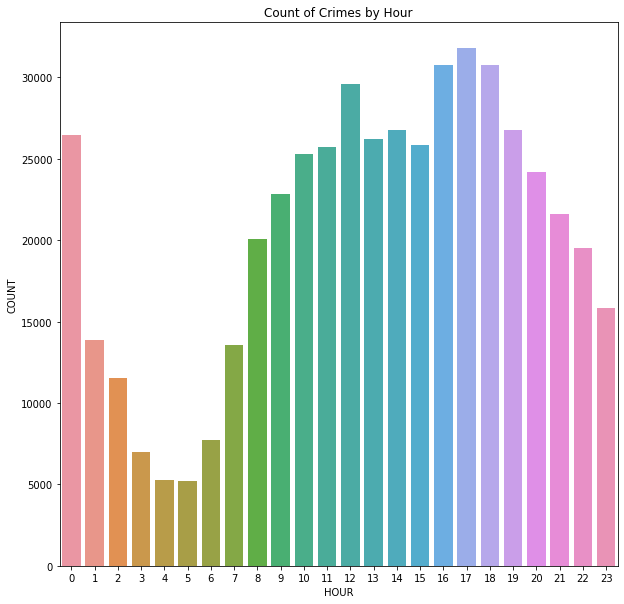

In [ ]:
crimes_hour = Crimes_all_years.groupby('HOUR')['index'].agg(count='count')
crimes_hour = pd.DataFrame({'HOUR':crimes_hour.index,'COUNT':crimes_hour['count']})
ax = sns.barplot(x=crimes_hour.HOUR,y=crimes_hour.COUNT)
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Hour');

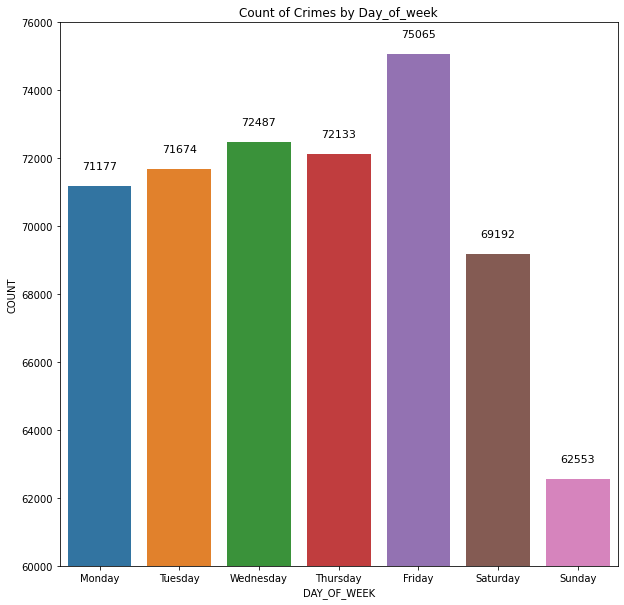

In [ ]:
crimes_weekday = Crimes_all_years.groupby('DAY_OF_WEEK')['index'].agg(count='count')
crimes_weekday = crimes_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
crimes_weekday = pd.DataFrame({'DAY_OF_WEEK':crimes_weekday.index,'COUNT':crimes_weekday['count']})
ax = sns.barplot(x=crimes_weekday.DAY_OF_WEEK,y=crimes_weekday.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(60000, 76000))
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Day_of_week');

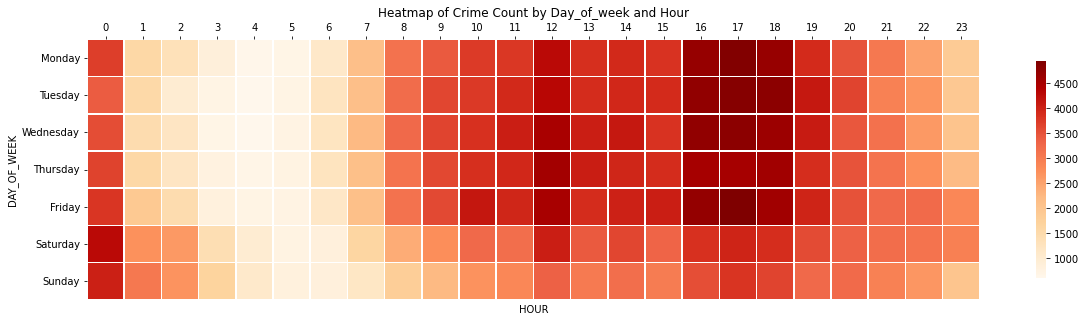

In [ ]:
crimes_weekday_hour = Crimes_all_years.groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Day_of_week and Hour');

## **By Season**

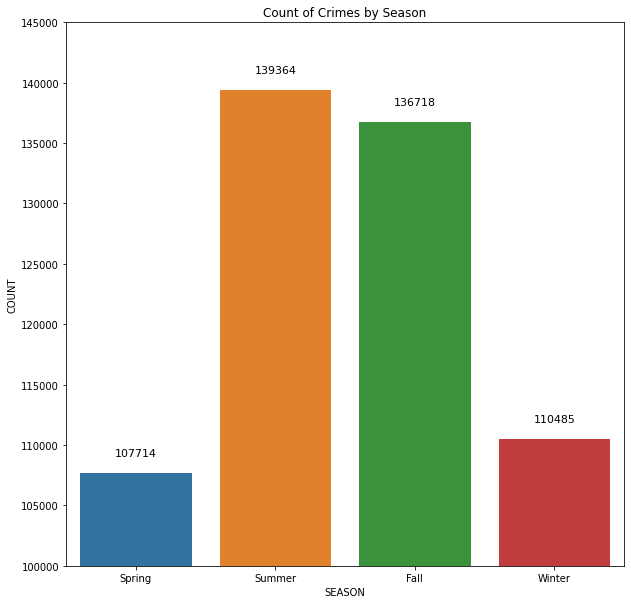

In [ ]:
Crimes_all_years['SEASON']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([3,4,5]),'SEASON']='Spring'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([6,7,8]),'SEASON']='Summer'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([9,10,11]),'SEASON']='Fall'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12,1,2]),'SEASON']='Winter'
crimes_season = Crimes_all_years.groupby('SEASON')['index'].agg(count='count')
crimes_season = crimes_season.reindex(['Spring','Summer','Fall','Winter'])
crimes_season = pd.DataFrame({'SEASON':crimes_season.index,'COUNT':crimes_season['count']})
ax = sns.barplot(x=crimes_season.SEASON,y=crimes_season.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(100000, 145000))
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Season');

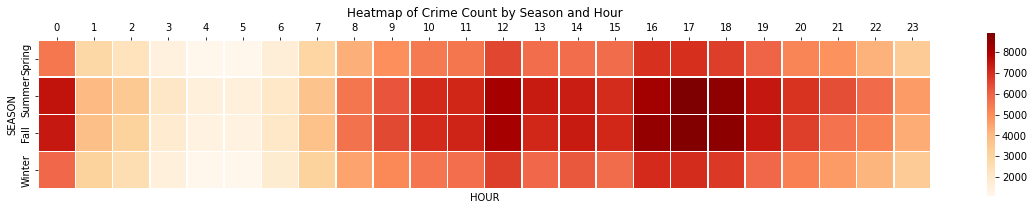

In [ ]:
crimes_season_hour = Crimes_all_years.groupby(['SEASON','HOUR'])['index'].aggregate('count').unstack()
crimes_season_hour = crimes_season_hour.reindex(['Spring','Summer','Fall','Winter'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_season_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.15}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Season and Hour');

## **By Year**

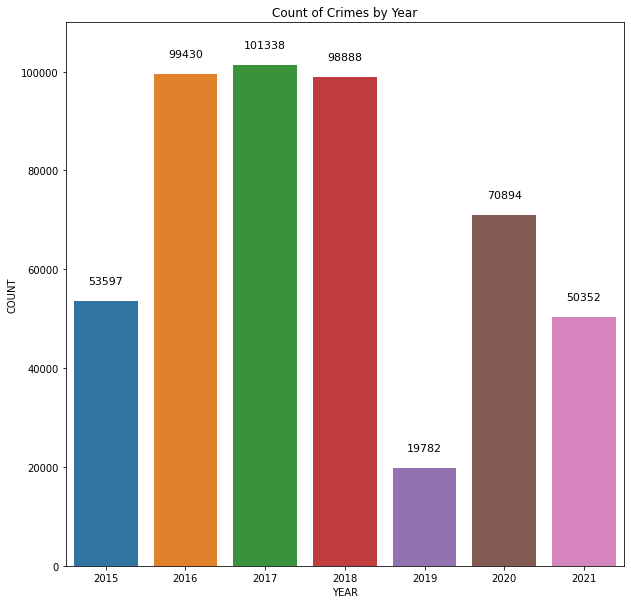

In [ ]:
crimes_year = Crimes_all_years.groupby('YEAR')['index'].agg(count='count')
crimes_year = pd.DataFrame({'YEAR':crimes_year.index,'COUNT':crimes_year['count']})
sns.set_context({"figure.figsize":(10,10)})
ax = sns.barplot(x=crimes_year.YEAR,y=crimes_year.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(0, 110000))
ax.set_title('Count of Crimes by Year');

## **By Offence Type**

Because offence types are only specified in OFFENSE_DESCRIPTION where OFFENSE_CODE_GROUP is 'other' since 2019, therefore the cleaned general office types are saved in the TYPE column.

In [ ]:
Crimes_all_years['TYPE']=''
def check(s):
    s=s.lower()
    if s.find('m/v') > -1:
        s =  'motor vehicle accident response'
    elif s.find('liquor/alcohol')>-1:
        s = 'liquor/alcohol'
    elif s.find('/') >= 0 or s.find('-') >= 0 or s.find('(') >= 0:
        while s.find('/') >= 0 or s.find('-') >= 0 or s.find('(') >= 0:
            if (s.find('/') > 0 and s.find('-') > 0 and s.find('(') > 0):
                a = min(s.find('/'),s.find('-')-1,s.find('(')-1)
            elif s.find('(') > 0:
                a = s.find('(') -1
            elif s.find('-') > 0:
                a = s.find('-') -1
            elif s.find('/') > 0:
                a = s.find('/')
            s = s[:a]
    return s
Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'TYPE']=Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'OFFENSE_DESCRIPTION']
Crimes_all_years.loc[Crimes_all_years['YEAR']>2018,'TYPE']=Crimes_all_years[Crimes_all_years['YEAR']>2018]['TYPE'].apply(lambda x:check(x))
Crimes_all_years.loc[Crimes_all_years['YEAR']<2019,'TYPE']=Crimes_all_years[Crimes_all_years['YEAR']<2019]['OFFENSE_CODE_GROUP'].apply(lambda x:check(x))

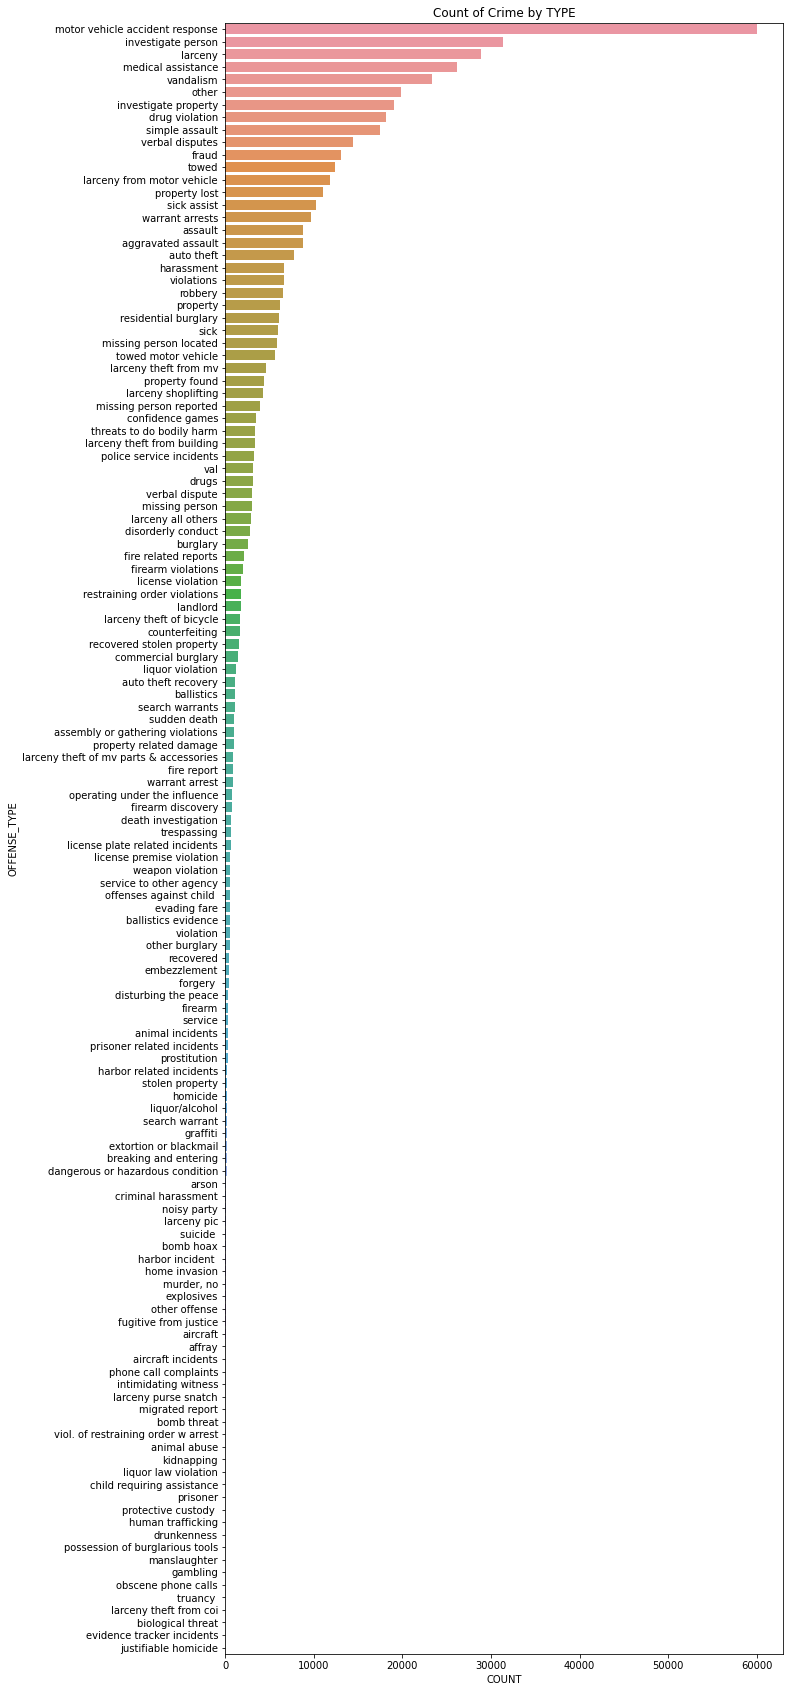

In [ ]:
crimes_offence = Crimes_all_years.groupby('TYPE')['index'].agg(count='count').sort_values(by='count',ascending=False)
crimes_offence = pd.DataFrame({'OFFENSE_TYPE':crimes_offence.index,'COUNT':crimes_offence['count']})
sns.set_context({"figure.figsize":(10,30)})
ax = sns.barplot(y=crimes_offence.OFFENSE_TYPE,x=crimes_offence.COUNT);
ax.set_title('Count of Crime by TYPE');

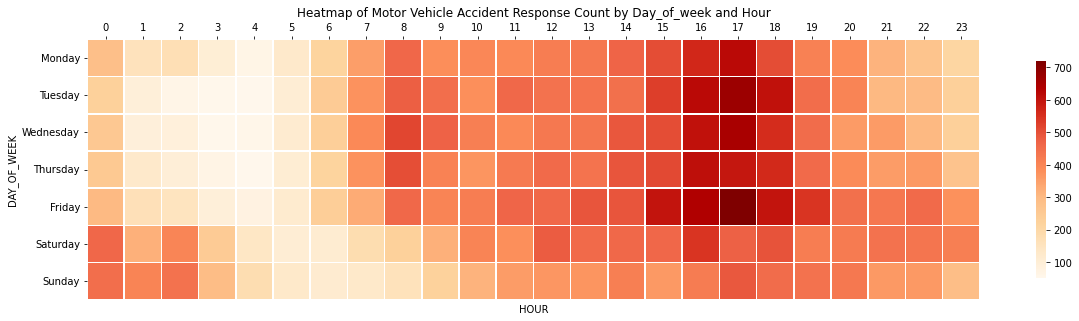

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'motor vehicle accident response'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Motor Vehicle Accident Response Count by Day_of_week and Hour');

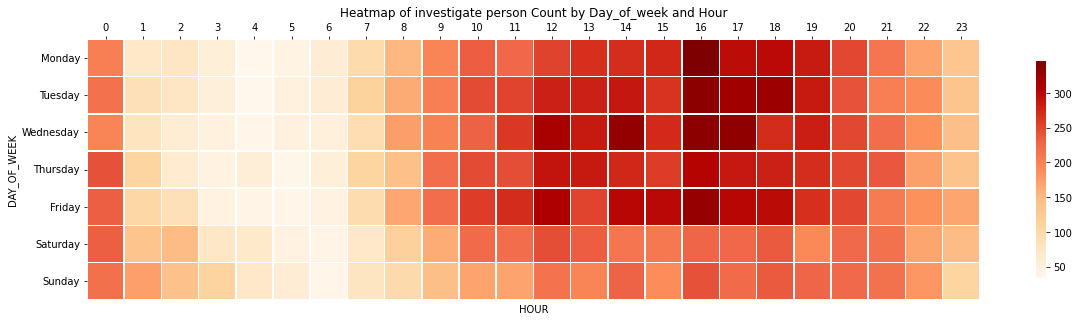

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'investigate person'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Investigate Person Count by Day_of_week and Hour');

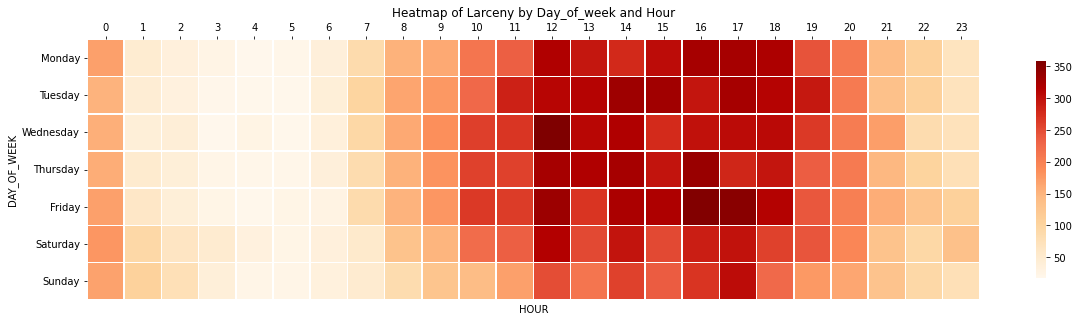

In [ ]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['TYPE'] == 'larceny'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Larceny by Day_of_week and Hour');

In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'motor vehicle accident response'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
WASHINGTON ST,2064
BLUE HILL AVE,1892
DORCHESTER AVE,1151
CENTRE ST,923
HYDE PARK AVE,857


In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'larceny'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
BOYLSTON ST,2394
WASHINGTON ST,2142
NEWBURY ST,955
HUNTINGTON AVE,914
TREMONT ST,657


In [ ]:
Crimes_all_years[Crimes_all_years['TYPE'] == 'vandalism'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
WASHINGTON ST,882
BLUE HILL AVE,424
DORCHESTER AVE,373
COMMONWEALTH AVE,297
TREMONT ST,260


## **Map**